In [20]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os
 

In [21]:
print("--- Urban Transport Network Analysis (Large Mumbai Network) ---")

# --- Define CSV file paths ---
nodes_csv_path = 'transport_stations.csv'
edges_csv_path = 'transport_routes.csv'

#  Model a Public Transport System as a Network by Reading from CSVs ---
G_transport = nx.Graph()


try:
    df_stations_read = pd.read_csv(nodes_csv_path)
    print(df_stations_read.head())  
    G_transport.add_nodes_from(df_stations_read['StationName'].tolist())
    print(f"Nodes loaded from '{nodes_csv_path}'. Total stations: {G_transport.number_of_nodes()}")
except FileNotFoundError:
    print(f"Error: {nodes_csv_path} not found. Please ensure it's generated and in the correct directory.")
    exit()

# Read edges from CSV
try:
    df_routes_read = pd.read_csv(edges_csv_path)
    print(df_routes_read.head())
    df_routes_read['Weight'] = pd.to_numeric(df_routes_read['Weight'], errors='coerce')
    df_routes_read.dropna(subset=['Weight'], inplace=True)
    df_routes_read['Weight'] = df_routes_read['Weight'].astype(int)
    
    weighted_edges = [(row['Source'], row['Target'], {'weight': row['Weight']})
                      for index, row in df_routes_read.iterrows()]
    G_transport.add_edges_from(weighted_edges)
    print(f"Edges loaded from '{edges_csv_path}'. Total routes: {G_transport.number_of_edges()}")
except FileNotFoundError:
    print(f"Error: {edges_csv_path} not found. Please ensure it's generated and in the correct directory.")
    exit()


print(f"\nUrban Transport Network (Mumbai) created with {G_transport.number_of_nodes()} stations and {G_transport.number_of_edges()} routes.")

--- Urban Transport Network Analysis (Large Mumbai Network) ---
      StationName
0            CSMT
1          Masjid
2  Sandhurst Road
3         Byculla
4     Chinchpokli
Nodes loaded from 'transport_stations.csv'. Total stations: 155
           Source          Target Weight
0            CSMT          Masjid      2
1          Masjid  Sandhurst Road      2
2  Sandhurst Road         Byculla      3
3         Byculla     Chinchpokli      2
4     Chinchpokli     Currey Road      1
Edges loaded from 'transport_routes.csv'. Total routes: 257

Urban Transport Network (Mumbai) created with 213 stations and 257 routes.


In [ ]:
#  Analyze Shortest Routes 
print("\n--- Shortest Route Analysis ---")

# Function to find and print shortest path
def find_and_print_shortest_path(graph, start, end):
    if not graph.has_node(start):
        print(f"Error: Start station '{start}' not found in the network. Available nodes: {list(graph.nodes())[:5]}...")
        return
    if not graph.has_node(end):
        print(f"Error: End station '{end}' not found in the network. Available nodes: {list(graph.nodes())[:5]}...")
        return

    if nx.has_path(graph, start, end):
        shortest_path = nx.shortest_path(graph, source=start, target=end, weight='weight')
        shortest_path_length = nx.shortest_path_length(graph, source=start, target=end, weight='weight')
        print(f"\nShortest path from '{start}' to '{end}':")
        print(f"Path: {' -> '.join(shortest_path)}")
        print(f"Total Travel Time : {shortest_path_length} minutes")
    else:
        print(f"\nNo path found between '{start}' and '{end}'.")
        
# Define some example start and end stations for Mumbai
start_station_1 = "Virar"
end_station_1 = "Churchgate"

start_station_2 = "Thane"
end_station_2 = "Versova"

start_station_3 = "Panvel"
end_station_3 = "Sion"

# Test the paths
find_and_print_shortest_path(G_transport, start_station_1, end_station_1)
find_and_print_shortest_path(G_transport, start_station_2, end_station_2)
find_and_print_shortest_path(G_transport, start_station_3, end_station_3)


--- Shortest Route Analysis ---

Shortest path from 'Virar' to 'Churchgate':
Path: Virar -> Nalasopara -> Vasai Road -> Bhayandar -> Mira Road -> Borivali -> Andheri -> Bandra -> CSMT -> Churchgate
Total Travel Time (Weight): 52 minutes

Shortest path from 'Thane' to 'Versova':
Path: Thane -> Mulund -> Bhandup -> Kanjurmarg -> JVLR -> Western Express Highway (Metro) -> Andheri (Metro) -> Azad Nagar (Metro) -> D.N. Nagar (Metro) -> Versova (Metro) -> Versova
Total Travel Time (Weight): 27 minutes

Shortest path from 'Panvel' to 'Sion':
Path: Panvel -> Nerul -> Vashi -> Sanpada -> Turbhe -> Mankhurd -> Govandi -> Chunabhatti -> Sion
Total Travel Time (Weight): 33 minutes


In [38]:
#  Overall Density of the Graph ---
print("\n--- Overall Network Density ---")
density_transport = nx.density(G_transport)
print(f"Overall Density of the Urban Transport Network: {density_transport:.4f}")
if(density_transport < 0.1):
    print("The network is sparse, indicating fewer connections relative to the number of stations.")
elif(density_transport >= 0.1 and density_transport < 0.5):
    print("The network has a moderate density, indicating a reasonable number of connections between stations.")
else:
    print("Interpretation: A higher density means more direct routes between stations relative to the maximum possible routes.")



--- Overall Network Density ---
Overall Density of the Urban Transport Network: 0.0114
The network is sparse, indicating fewer connections relative to the number of stations.



Ego Network Visualization (Dadar Station)
Ego network for 'Dadar' has 12 nodes and 14 edges.


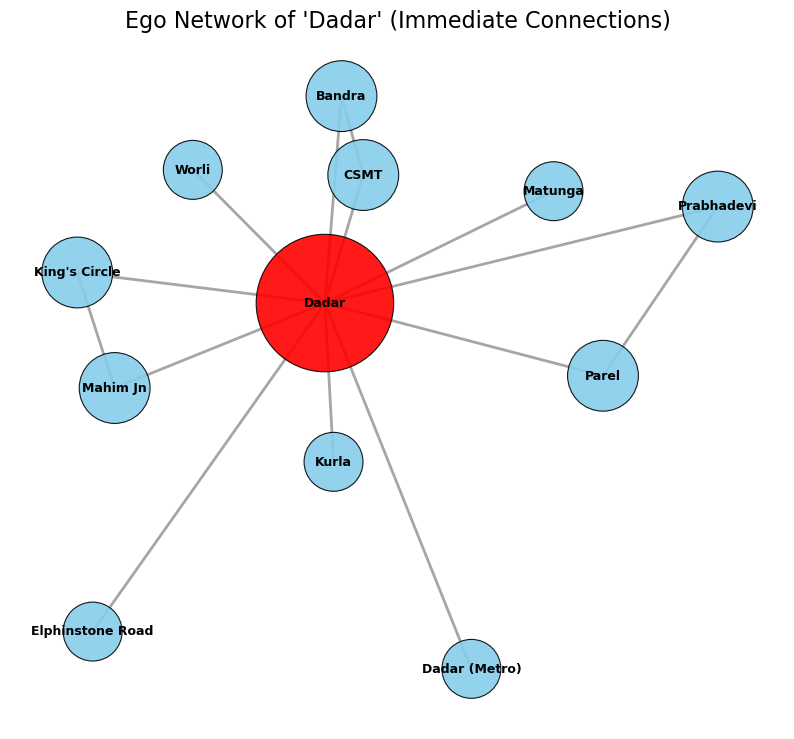


--- Urban Transport Network Analysis Complete ---


In [29]:
# Visualize an Ego Network of a Dadar
print("\nEgo Network Visualization (Dadar Station)")

ego_station_mumbai = "Dadar" 

if ego_station_mumbai not in G_transport.nodes():
    print(f"Error: '{ego_station_mumbai}' is not a valid station in the network. Please choose from the loaded stations.")
else:
    ego_graph = nx.ego_graph(G_transport, ego_station_mumbai, radius=1)

    print(f"Ego network for '{ego_station_mumbai}' has {ego_graph.number_of_nodes()} nodes and {ego_graph.number_of_edges()} edges.")

    plt.figure(figsize=(10, 9)) # Slightly larger figure for clarity
    pos_ego = nx.spring_layout(ego_graph, seed=42, k=0.8)

    # Node colors: Differentiate the ego node from its neighbors
    node_colors_ego = ['red' if node == ego_station_mumbai else 'skyblue' for node in ego_graph.nodes()]

    # Node sizes: Scale by degree within the ego network for visual importance
    ego_node_sizes = [ego_graph.degree(node) * 800 + 1000 for node in ego_graph.nodes()]


    nx.draw_networkx_nodes(ego_graph, pos_ego,
                           node_color=node_colors_ego,
                           node_size=ego_node_sizes,
                           alpha=0.9,
                           edgecolors='black',
                           linewidths=0.8)

    nx.draw_networkx_edges(ego_graph, pos_ego,
                           edge_color='gray',
                           width=2,
                           alpha=0.7)

    nx.draw_networkx_labels(ego_graph, pos_ego,
                            font_size=9,
                            font_color='black',
                            font_weight='bold')

    plt.title(f"Ego Network of '{ego_station_mumbai}' (Immediate Connections)", fontsize=16)
    plt.axis('off')
    plt.show()

print("\n--- Urban Transport Network Analysis Complete ---")


Ego Network Visualization (Andheri Station)
Ego network for 'Andheri' has 10 nodes and 10 edges.


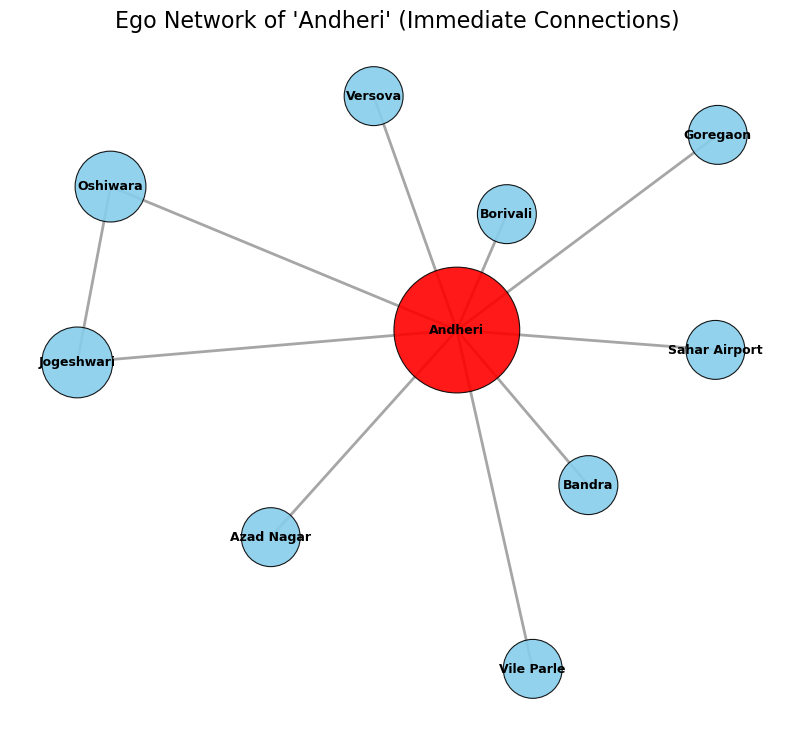


--- Urban Transport Network Analysis Complete ---


In [34]:
# Visualize an Ego Network of a Andheri
print("\nEgo Network Visualization (Andheri Station)")

ego_station_mumbai = "Andheri"

if ego_station_mumbai not in G_transport.nodes():
    print(f"Error: '{ego_station_mumbai}' is not a valid station in the network. Please choose from the loaded stations.")
else:
    ego_graph = nx.ego_graph(G_transport, ego_station_mumbai, radius=1)

    print(f"Ego network for '{ego_station_mumbai}' has {ego_graph.number_of_nodes()} nodes and {ego_graph.number_of_edges()} edges.")

    plt.figure(figsize=(10, 9)) # Slightly larger figure for clarity
    pos_ego = nx.spring_layout(ego_graph, seed=42, k=0.8)

    # Node colors: Differentiate the ego node from its neighbors
    node_colors_ego = ['red' if node == ego_station_mumbai else 'skyblue' for node in ego_graph.nodes()]

    # Node sizes: Scale by degree within the ego network for visual importance
    ego_node_sizes = [ego_graph.degree(node) * 800 + 1000 for node in ego_graph.nodes()]


    nx.draw_networkx_nodes(ego_graph, pos_ego,
                           node_color=node_colors_ego,
                           node_size=ego_node_sizes,
                           alpha=0.9,
                           edgecolors='black',
                           linewidths=0.8)

    nx.draw_networkx_edges(ego_graph, pos_ego,
                           edge_color='gray',
                           width=2,
                           alpha=0.7)

    nx.draw_networkx_labels(ego_graph, pos_ego,
                            font_size=9,
                            font_color='black',
                            font_weight='bold')

    plt.title(f"Ego Network of '{ego_station_mumbai}' (Immediate Connections)", fontsize=16)
    plt.axis('off')
    plt.show()

print("\n--- Urban Transport Network Analysis Complete ---")

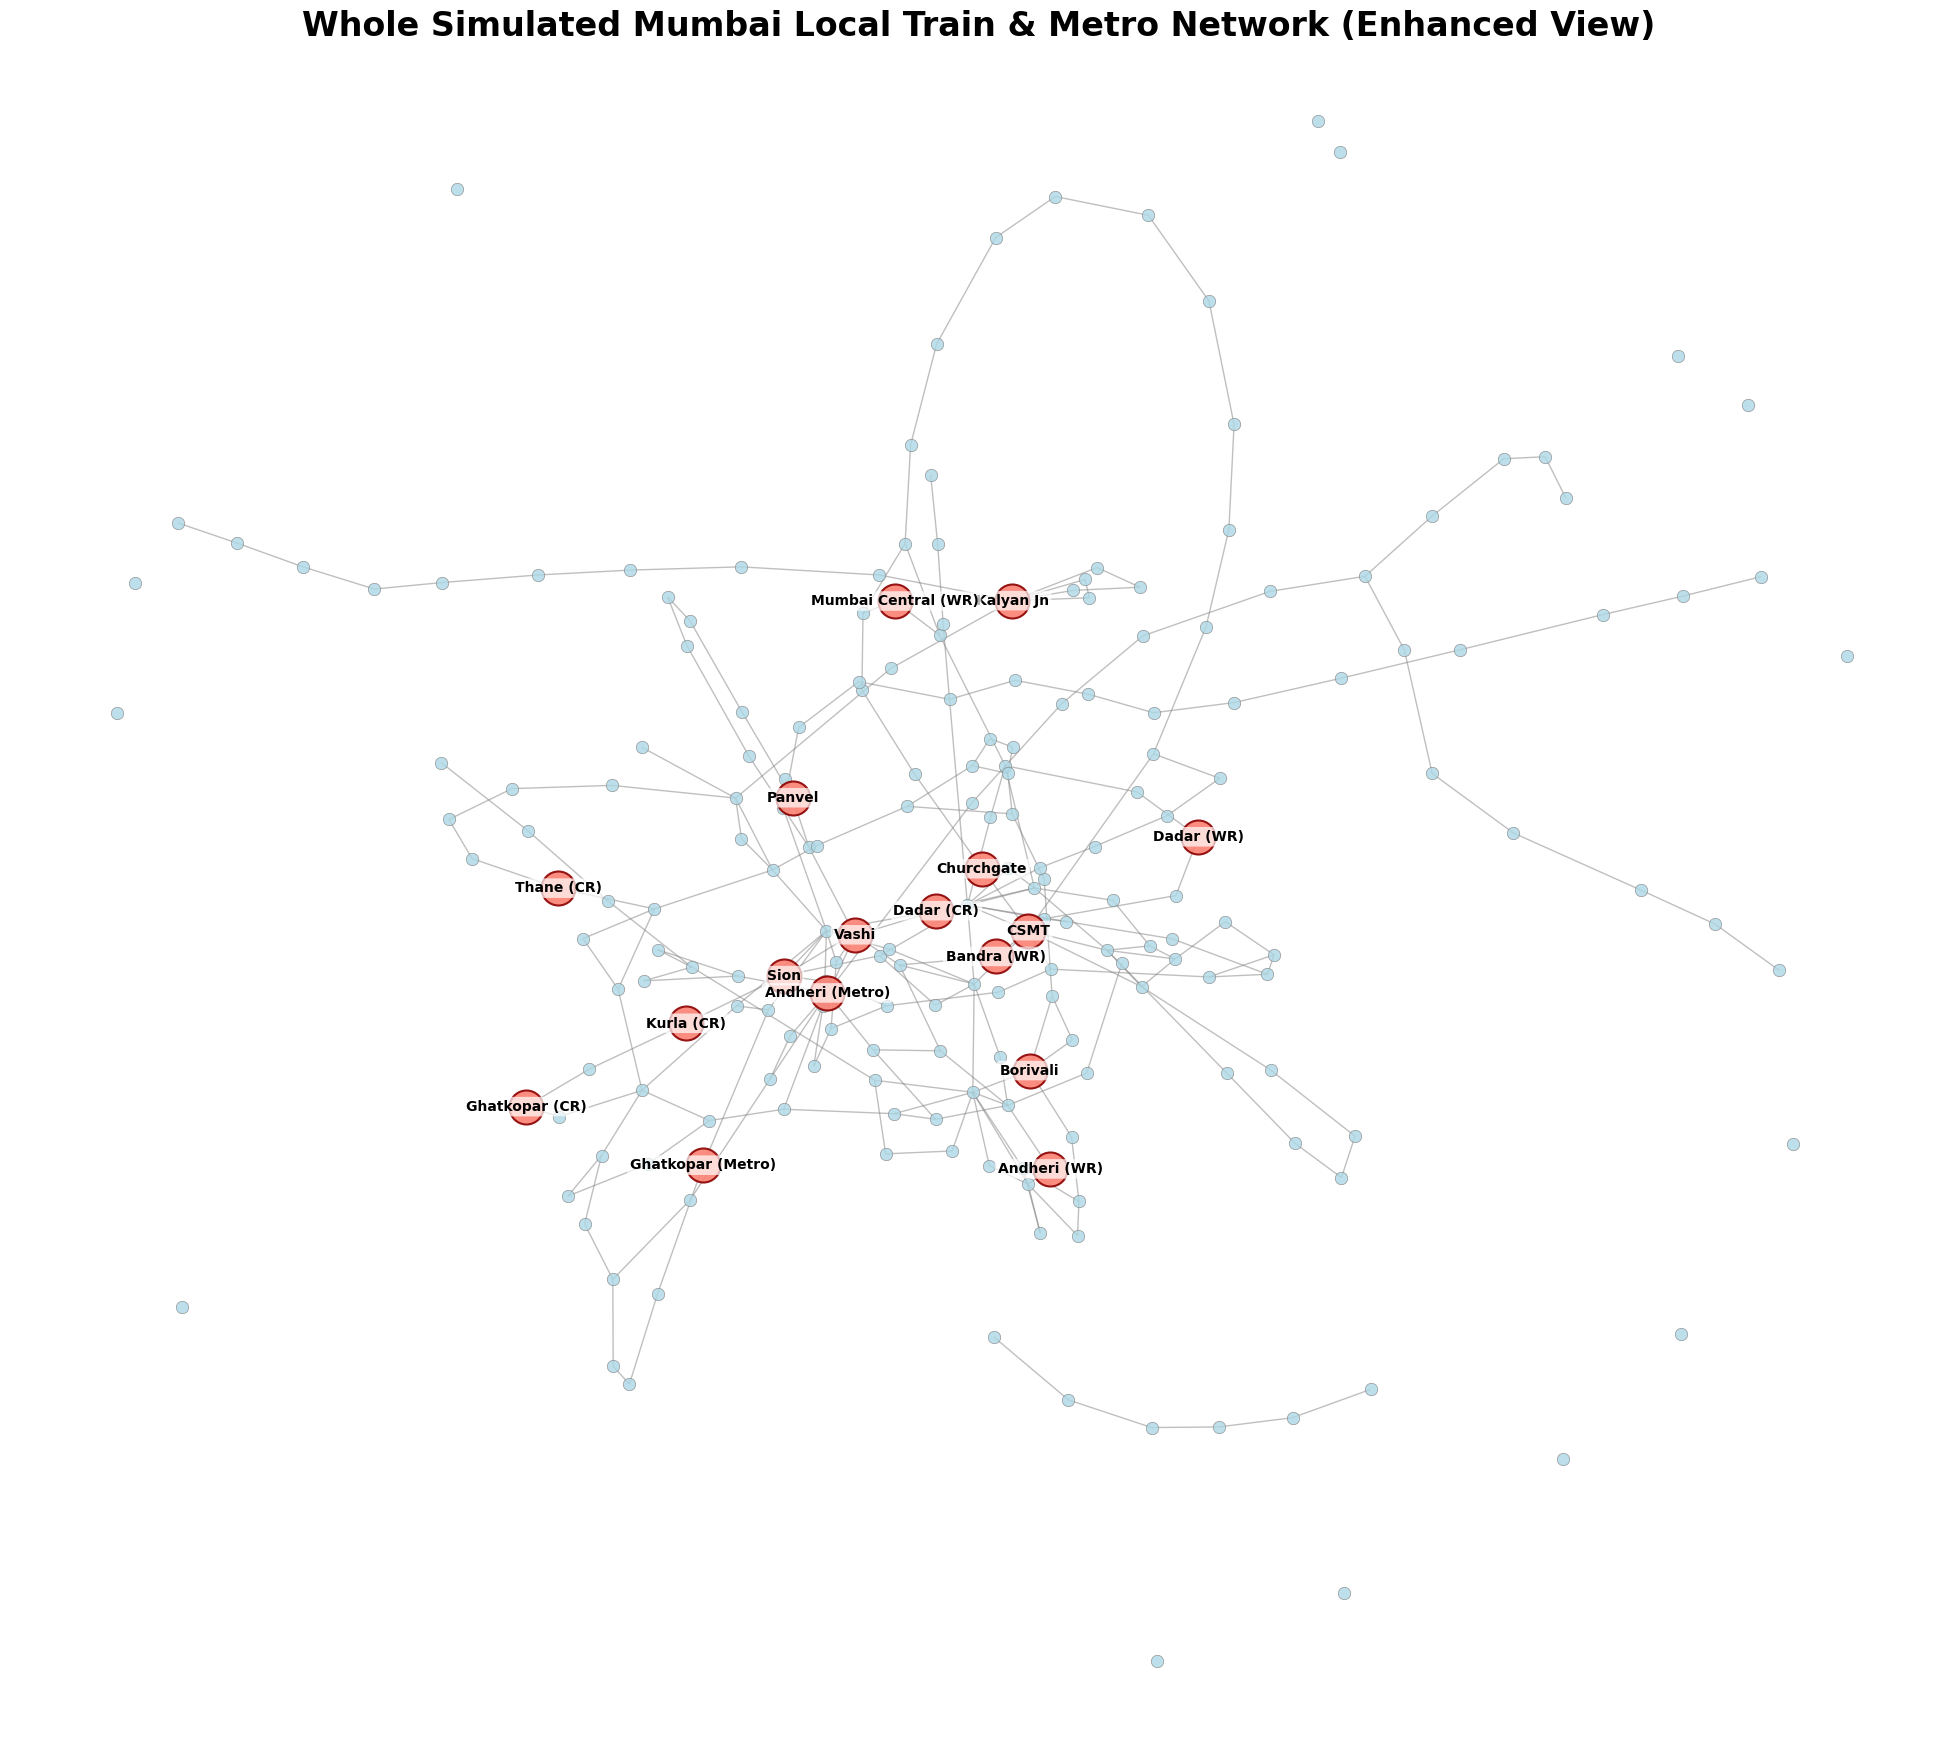


Enhanced whole network visualization displayed. Major junctions are highlighted.
You may need to zoom in on the displayed image to see details for smaller regions.
--- Visualization Complete ---


In [ ]:
#  Visualize the Entire Network ---
plt.figure(figsize=(25, 22)) 


pos = nx.spring_layout(G_transport, k=0.15, iterations=70, seed=42)

# Identify major junction stations to highlight
major_junctions = [
    "CSMT", "Dadar (CR)", "Dadar (WR)", "Andheri (WR)", "Andheri (Metro)",
    "Kurla (CR)", "Ghatkopar (CR)", "Ghatkopar (Metro)", "Thane (CR)",
    "Mumbai Central (WR)", "Kalyan Jn", "Panvel", "Churchgate", "Borivali",
    "Vashi", "Bandra (WR)", "Sion"
]

# Separate nodes into major junctions and others for distinct styling
nodes_major = [n for n in G_transport.nodes() if n in major_junctions]
nodes_other = [n for n in G_transport.nodes() if n not in major_junctions]

# Draw Other Nodes
nx.draw_networkx_nodes(G_transport, pos,
                       nodelist=nodes_other,
                       node_color='lightblue',
                       node_size=80,
                       alpha=0.8,
                       edgecolors='gray',
                       linewidths=0.5)

# Draw Major Junction Nodes (on top)
nx.draw_networkx_nodes(G_transport, pos,
                       nodelist=nodes_major,
                       node_color='salmon',
                       node_size=600,
                       alpha=0.9,
                       edgecolors='darkred',
                       linewidths=1.5)

# --- Edge properties ---
edge_color = 'gray'
edge_width = 1.0
edge_alpha = 0.5

# Draw Edges
nx.draw_networkx_edges(G_transport, pos,
                       edge_color=edge_color,
                       width=edge_width,
                       alpha=edge_alpha)

# --- Labels ---
labels_to_show = {node: node for node in G_transport.nodes() if node in major_junctions}
nx.draw_networkx_labels(G_transport, pos,
                        labels=labels_to_show,
                        font_size=10, 
                        font_color='black',
                        font_weight='bold',
                        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))


plt.title("Whole Simulated Mumbai Local Train & Metro Network ", fontsize=24, weight='bold')
plt.axis('off')
plt.show()

print("--- Visualization Complete ---")